In [1]:
from array import array
from skmultiflow.data import RegressionGenerator
from sail.models.torch.tcn import TCNRegressor
import numpy as np
import torch

/Users/mehkj/miniconda3_i386/envs/imla/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
n_samples = 6000
n_features = 12
stream = RegressionGenerator(random_state=1,
                             n_samples=n_samples,
                             n_features=n_features)
learner_tcn = TCNRegressor(n_features, 1)


In [3]:
cnt = 0
y_true = array('d')
y_pred = array('d') 
index = []
i = 0
wait_samples = 30
while cnt < n_samples and stream.has_more_samples():
    X, y = stream.next_sample(batch_size=wait_samples)
    y = np.array(y)
    X = np.array(X)
    y = y.reshape(y.shape[0], -1)
    X = X.astype(np.float32)
    y = y.astype(np.float32)

    # Test every n samples
    if (cnt % wait_samples == 0) & (cnt != 0):
        y_true.append(y[0])
        y_pred1 = learner_tcn.predict(X)[0][0]
        y_pred.append(y_pred1)
        index.append(i)
        i = i + 1
    learner_tcn.partial_fit(X, y)
    cnt += 1

  epoch    train_loss     dur
-------  ------------  ------
      1    37039.8385  0.0129
      2  7329592.9531  0.0052
      3           nan  0.0049
      4           nan  0.0053
      5           nan  0.0061
      6           nan  0.0049
      7           nan  0.0058
      8           nan  0.0054
      9           nan  0.0048
     10           nan  0.0061
     11           nan  0.0049
     12           nan  0.0052
     13           nan  0.0060
     14           nan  0.0048
     15           nan  0.0060
     16           nan  0.0053
     17           nan  0.0049
     18           nan  0.0068
     19           nan  0.0052
     20           nan  0.0051
     21           nan  0.0061
     22           nan  0.0048
     23           nan  0.0060
     24           nan  0.0050
     25           nan  0.0052
     26           nan  0.0067
     27           nan  0.0051
     28           nan  0.0057
     29           nan  0.0054
     30           nan  0.0049
     31           nan  0.0053
     32   

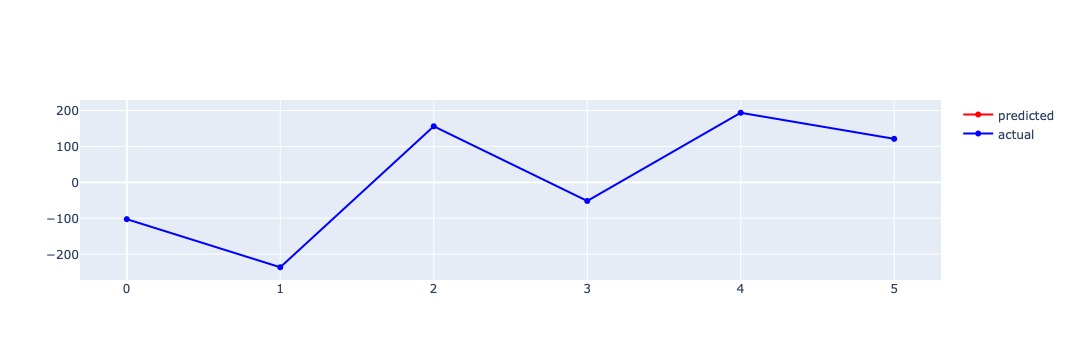

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = 'vscode'

y_pred = y_pred.tolist()
y_true = y_true.tolist()
fig = go.Figure()

fig.add_trace(go.Scatter(x=index, y=y_pred, name='predicted',
                         line=dict(color='red', width=2)))
fig.add_trace(go.Scatter(x=index, y=y_true, name='actual',
                         line=dict(color='blue', width=2)))
fig.show()